## Characteristics

Vector_paraxial_XY is a set of three modules for:

* Generation of 2D (xy-axis) paraxial vector light source.
* Generation of 2D (xy-axis) paraxial vector masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields.

These modules are named: vector_paraxial_fields_XY.py, vector_paraxial_sources_XY.py, and vector_paraxial_masks_XY.py.

Each module present a main class:

* Vector_paraxial_field_XY
* Vector_paraxial_mask_XY
* Vector_paraxial_source_XY

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.wavelength (float): wavelength of the incident field.
* (numpy.array): complex field with size 2D x.y  
    - self.Ex, 
    - self.Ey

    
We can also find these atributes:
* self.X (numpy.array): equal size to x * y. complex field
* self.Y (numpy.array): equal size to x * y. complex field
* self.quality (float): quality of RS propagation. Valid for values > 1.
* self.info (str): description of data.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

### Generation of light sources

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

### Creating an instance

In [1]:
from diffractio import degrees,  mm,  nm, np, plt, sp, um

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]
rcParams['figure.dpi']=125

### Generating a vectorial light source

Light sources are defined in the scalar_sources_xy.py module. When the field is initialized, the amplitude of the field is zero. Vector sources are generated using a scalar source and providing a vector polarization. There are many methods to convert a scalar source to a vector source:

* **constant_wave**: Generates a plane wave with a given direction and amplitude.
* **radial_wave**: Generates a plane wave with radial polarization.
* **transversal_wave**: Generates a plane wave with transversa polarization.
* **radial_inverse_wave**: 
* **transversal_inverse_wave*:
* **local_polarized_vector_wave**: Local radial polarized vector wave.
* **local_polarized_vector_wave_radial**: Local radial polarized vector wave.
* **local_polarized_vector_wave_hybrid**: Local hibrid polarized vector wave.
* **spiral_polarized_beam**: Spiral polarized wave.

For a more detailed description of each method, refer to the individual documentation of each one.

Example: gauss radial_wave

In [3]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)

wavelength = 0.6328 * um

Scalar source

In [4]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

Vector source

In [5]:
EM1 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM1.transversal_wave(u=u0, r0=(0,0), radius=(200,200))

If we need, we can convert the $E_x$ and $E_y$ fields in Scalar_field_XY.

In [6]:
Ex,Ey=EM1.get()
print(Ex)

Scalar_field_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um
 - ymin:       -125.00 um,  ymax:      125.00 um
 - Imin:       0.00,     Imax:      0.99
 - phase_min:  -180.00 deg, phase_max: 0.00 deg
 - wavelength: 0.63 um
 - date:       2021-05-09_18_02_10
 - info:       



We can obtain a variety of representation, simply using the draw method.

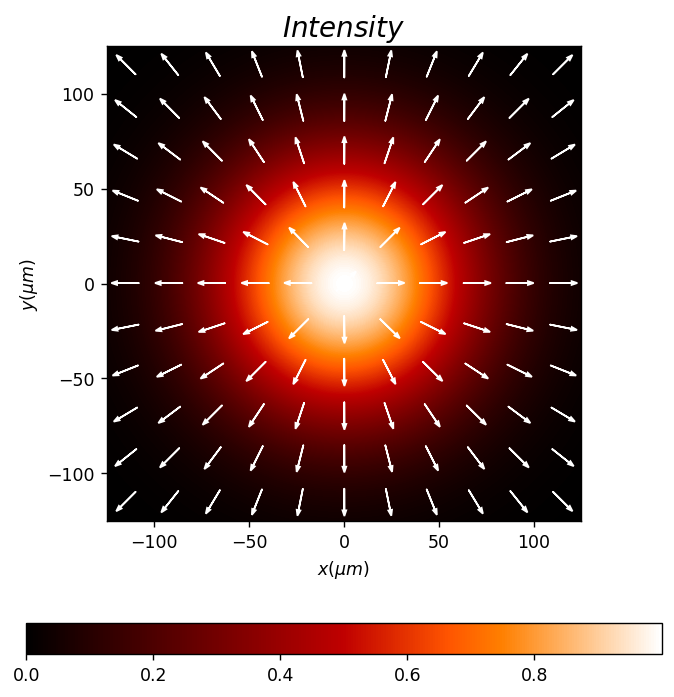

In [7]:
EM1.draw(kind='ellipses')

Polarimetric representation can be performed in a simple way.

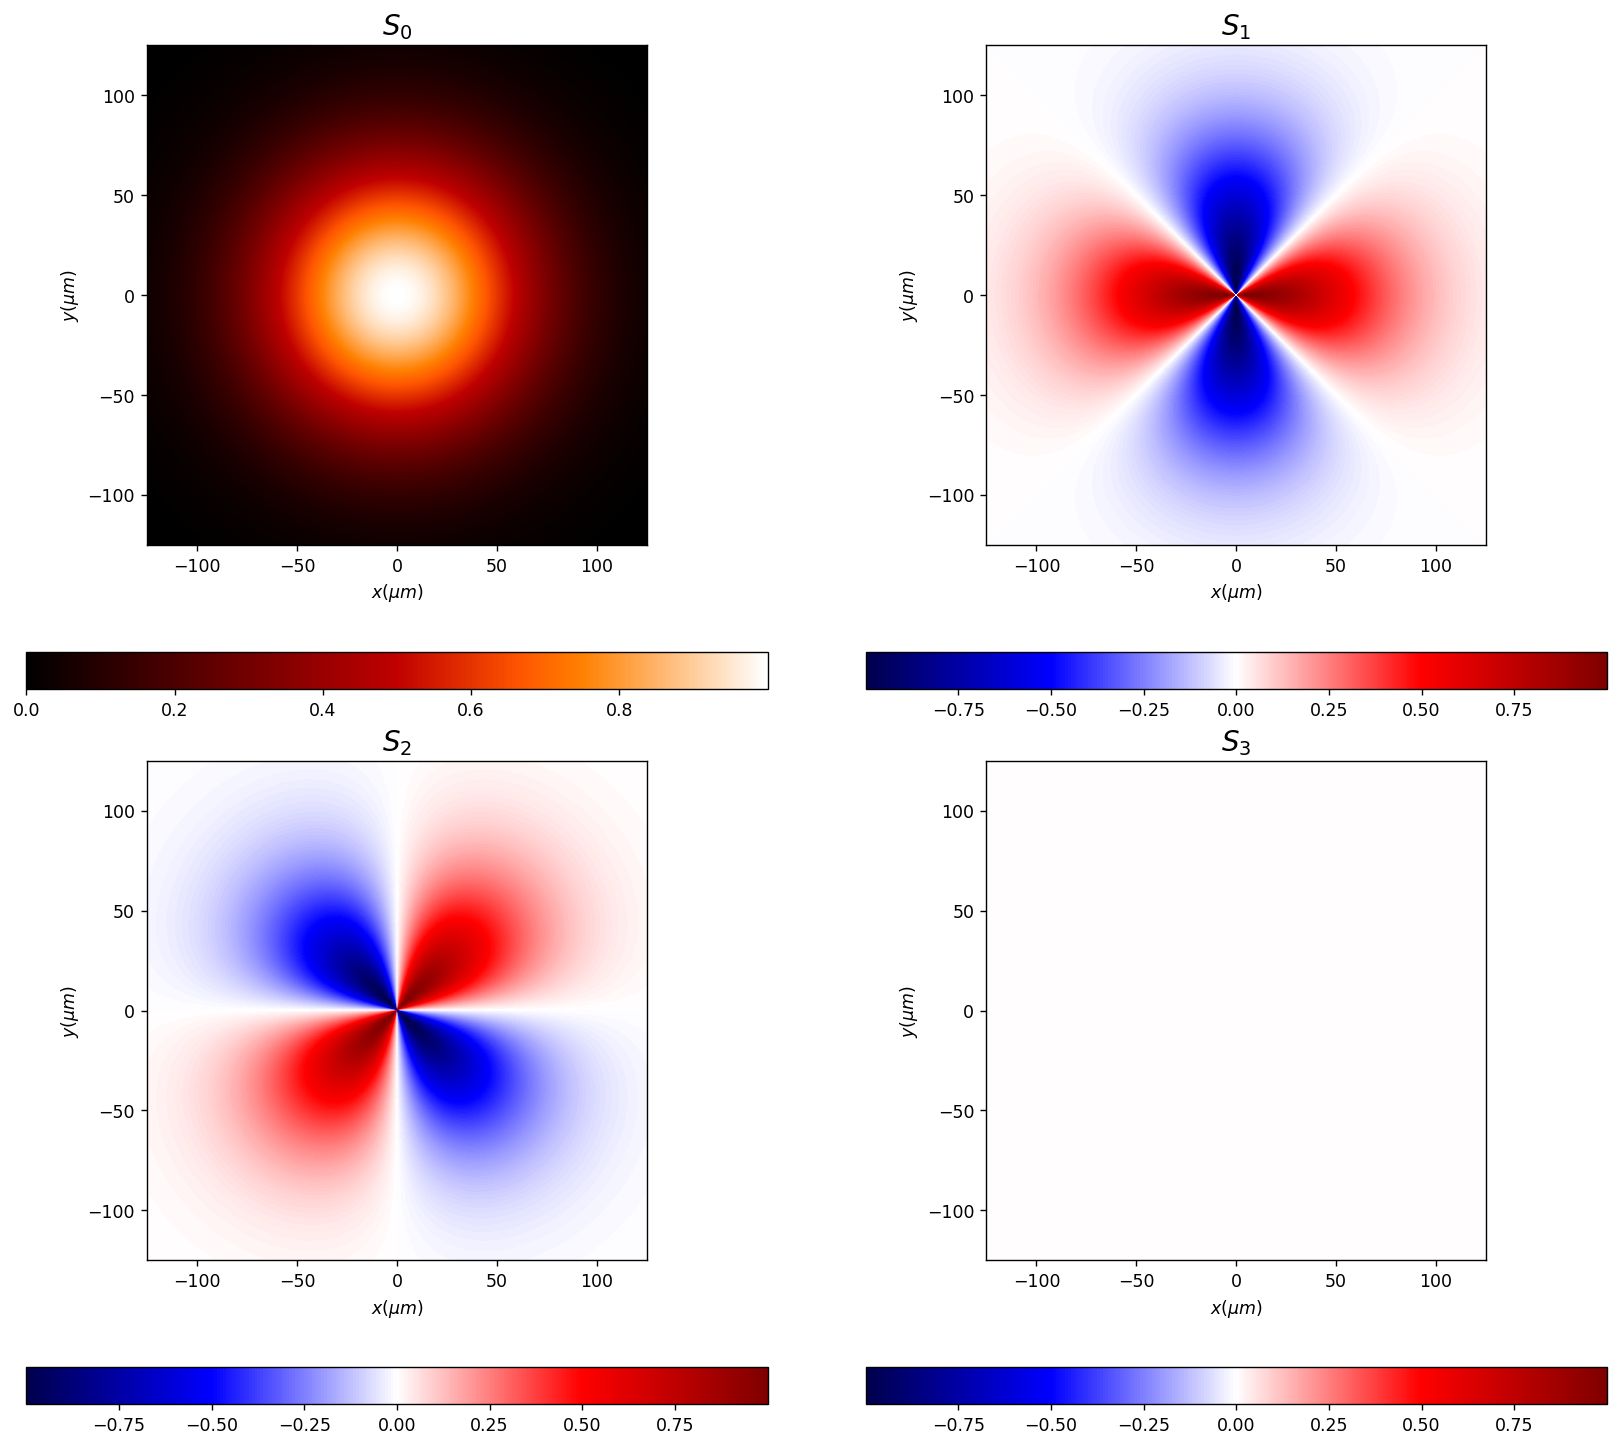

In [8]:
EM1.draw('stokes');

## A vector light source passes through a linear polarizer

<Figure size 1000x750 with 0 Axes>

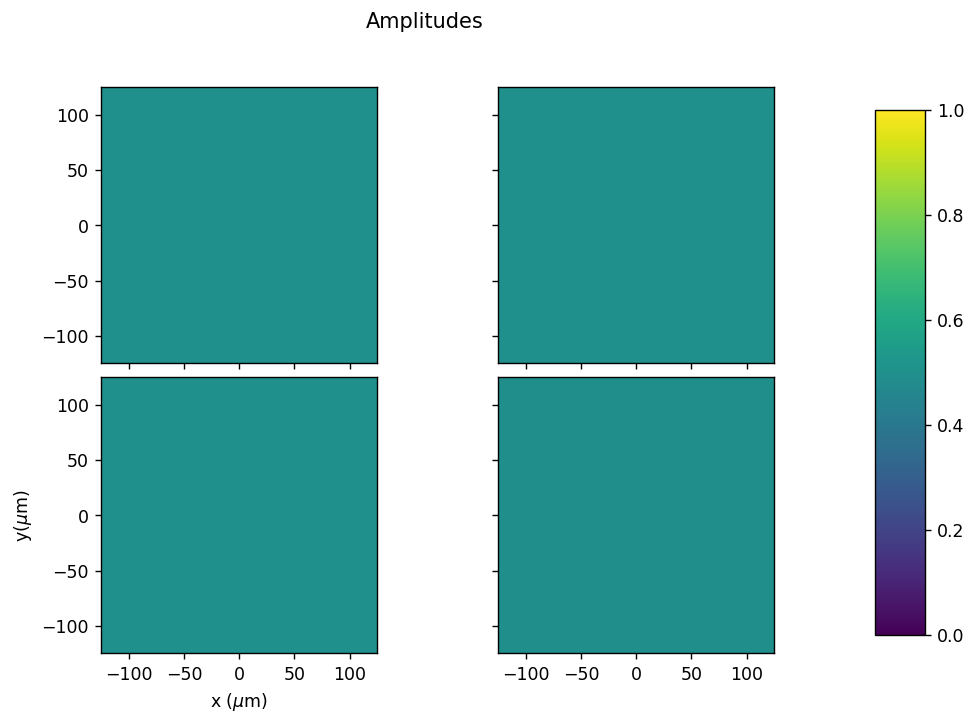

In [9]:
M1=Vector_paraxial_mask_XY(x=x0, y=y0, wavelength=wavelength)
M1.polarizer_linear(azimuth=45*degrees)
M1.draw()

### Multiplying fields by mask
We can have complex vector mask using the functions based on Scalar_XY masks. Also, vector masks are provided which act as simple polarizers.

In [10]:
EM2=EM1*M1

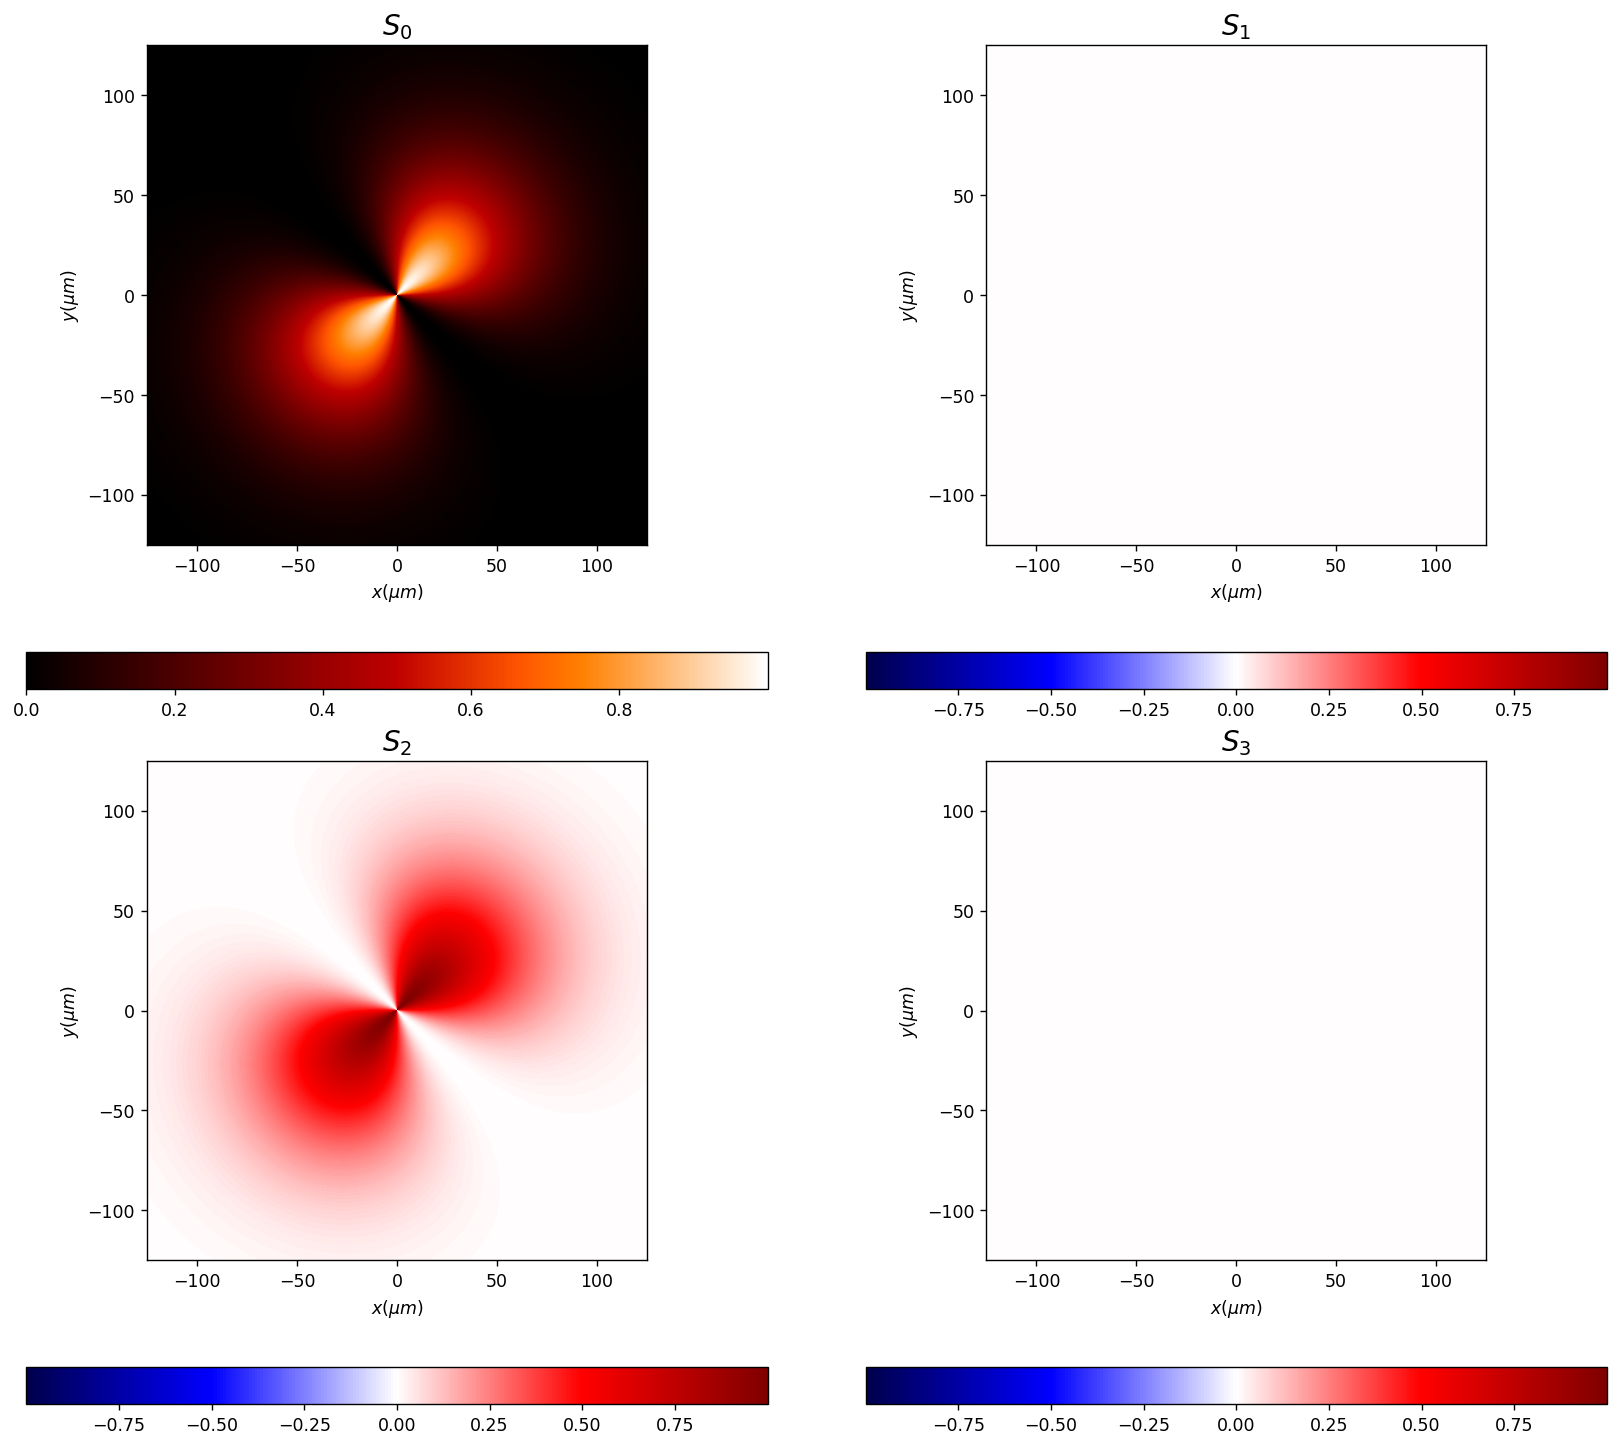

In [11]:
EM2
EM2.draw('stokes');

As the polarizer is linear at 45º, only $S_2$ parameter is obtained.

### Propagation
Vector fields can be propagated using Rayleigh-Sommerfeld approach.

In [12]:
EM3=EM2.RS(z=2*mm, new_field=True)

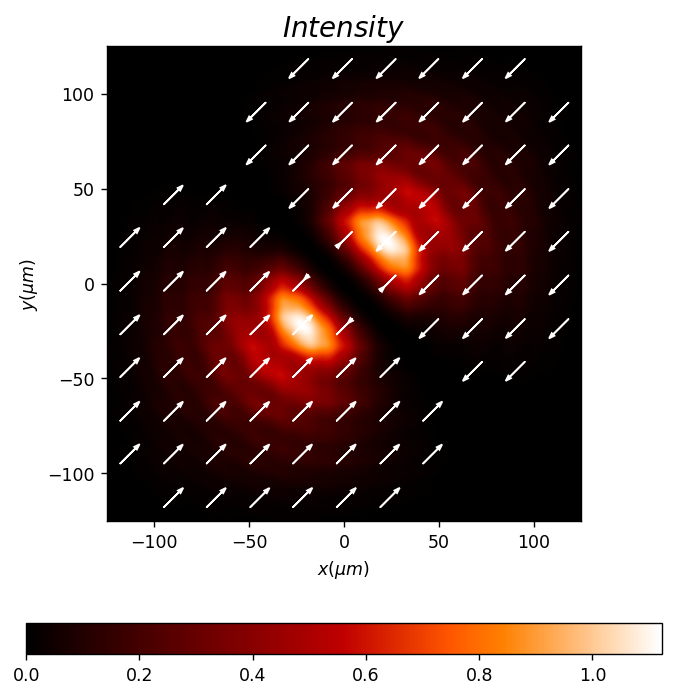

In [13]:
EM3.draw('ellipses')

Light is propagated, but as the polarization is the same for all the positions, the result is the same as an scalar propagation.

## Propagation of an spiral polarized beam 

In [14]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)

wavelength = 0.6328 * um

In [33]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(75 * um, 75 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

In [37]:
EM0 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM0.spiral_polarized_beam(u0, r0=(0,0), alpha=45*degrees)

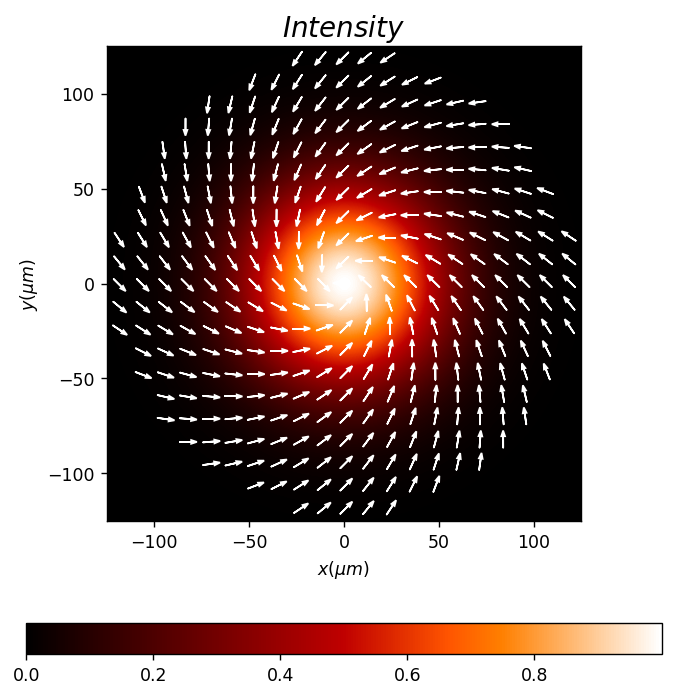

In [40]:
EM0.draw('ellipses', num_ellipses=(21, 21), amplification=0.5)

In [42]:
EM1=EM0.RS(z=5*mm, verbose=True)

Good result: factor 24.69


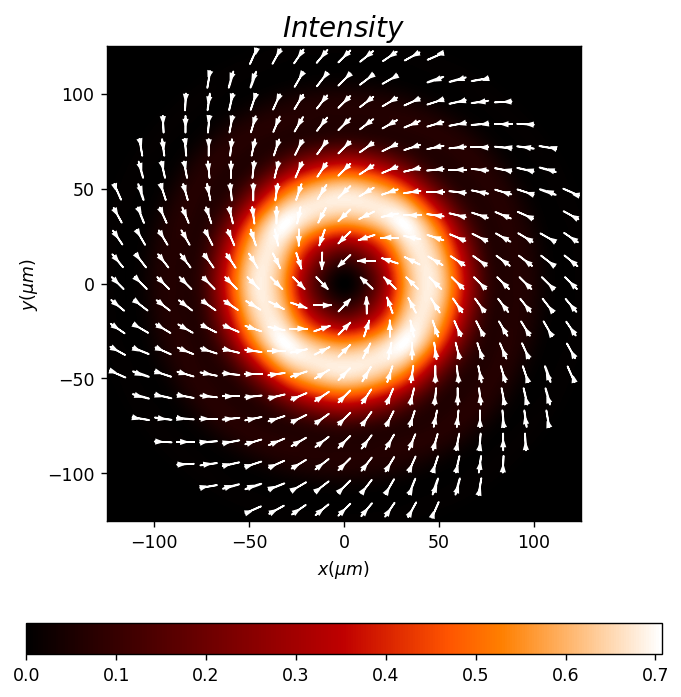

In [44]:
EM1.draw('ellipses', num_ellipses=(21, 21), amplification=0.75)

## Double Slit Experiment

### Equal polarization

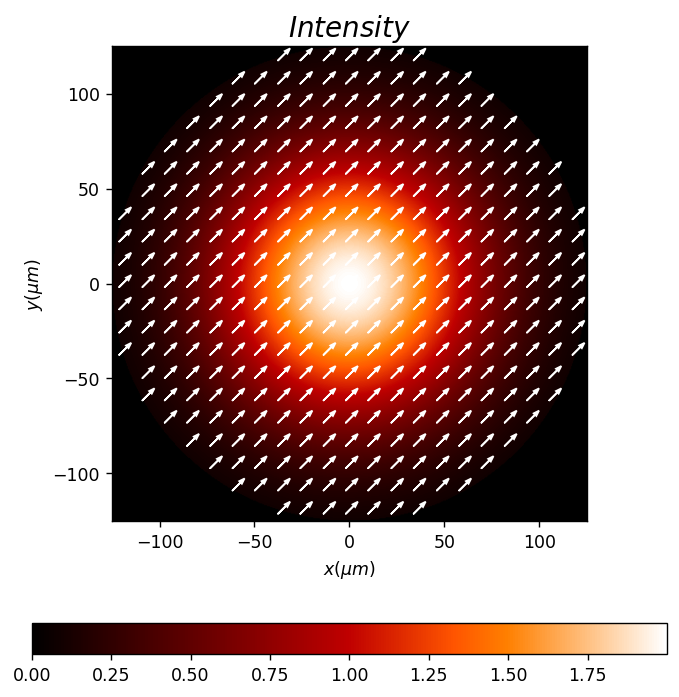

In [20]:
t1 = Scalar_mask_XY(x0,y0,wavelength)
t1.slit(x0=-40*um, size=80*um)
t1.square(r0=(-40,0), size=(40,160), angle=0)

t2 = Scalar_mask_XY(x0,y0,wavelength)
t2.slit(x0=40*um, size=80*um)
t2.square(r0=(40,0), size=(40,160), angle=0)


M1 = Vector_paraxial_mask_XY(x0, y0, wavelength)
M1.polarizer_linear(azimuth=0*degrees)
M1.apply_scalar_mask(t1)

M2 = Vector_paraxial_mask_XY(x0, y0, wavelength)
M2.polarizer_linear(azimuth=0*degrees)
M2.apply_scalar_mask(t2)


u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

EM0.constant_wave(u0, v=(1,1))
EM0.draw('ellipses', num_ellipses=(21,21))

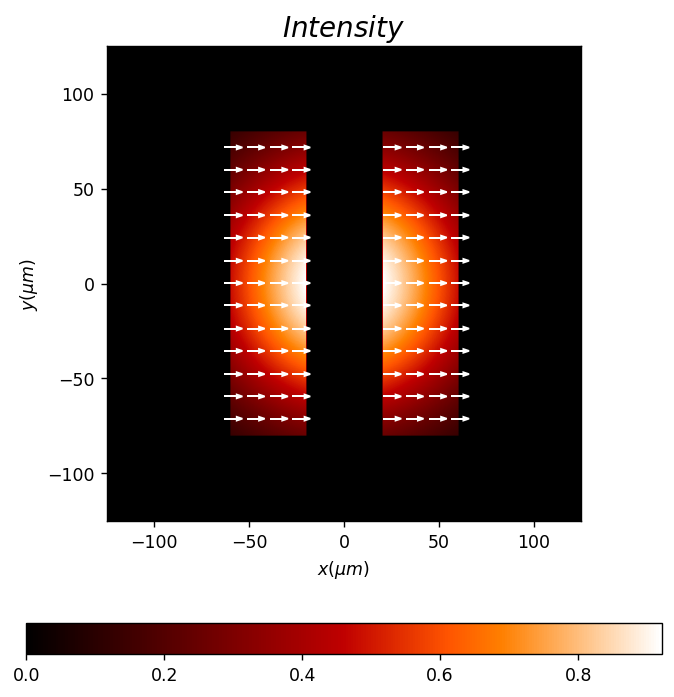

In [21]:
Et1=EM0*M1
Et2=EM0*M2


EM1=Et1+Et2
EM1.draw('ellipses', num_ellipses=(21,21))

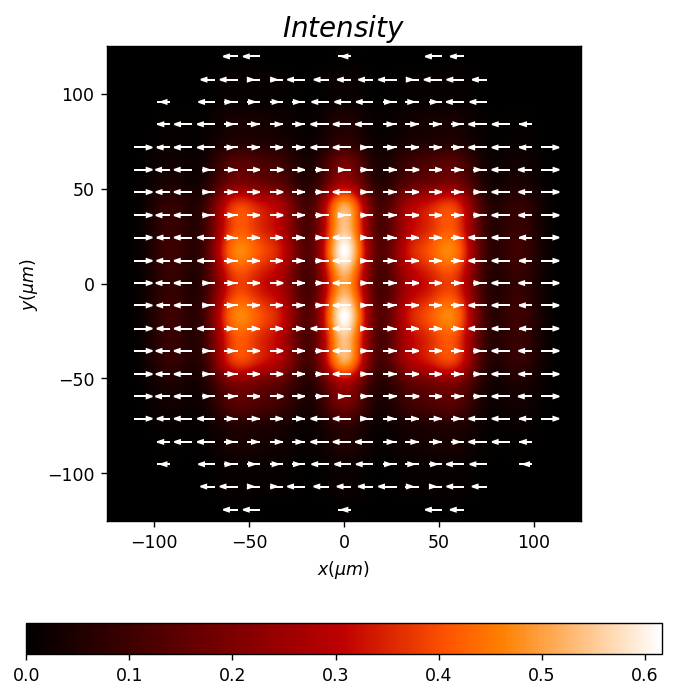

In [22]:
EM2=EM1.RS(z=5*mm)
EM2.draw('ellipses',num_ellipses=(21,21))

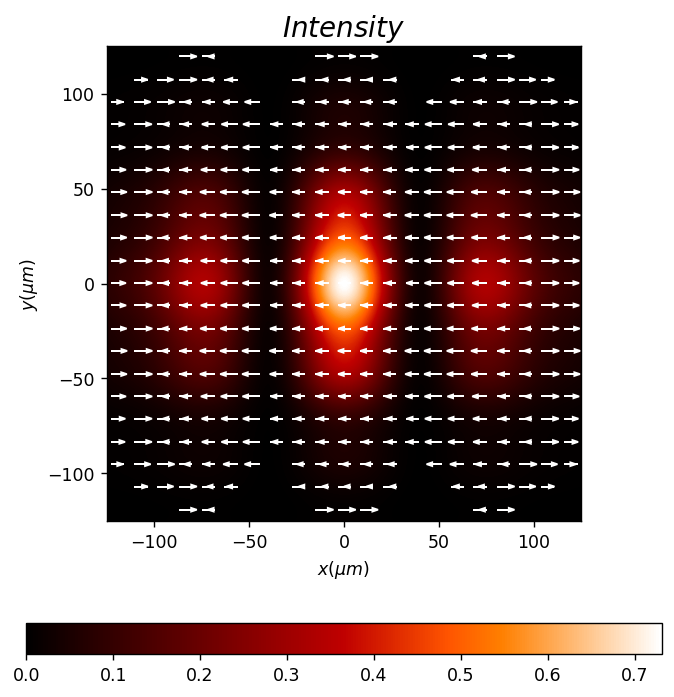

In [23]:
EM2=EM1.RS(z=10*mm,)
EM2.draw('ellipses',num_ellipses=(21,21))


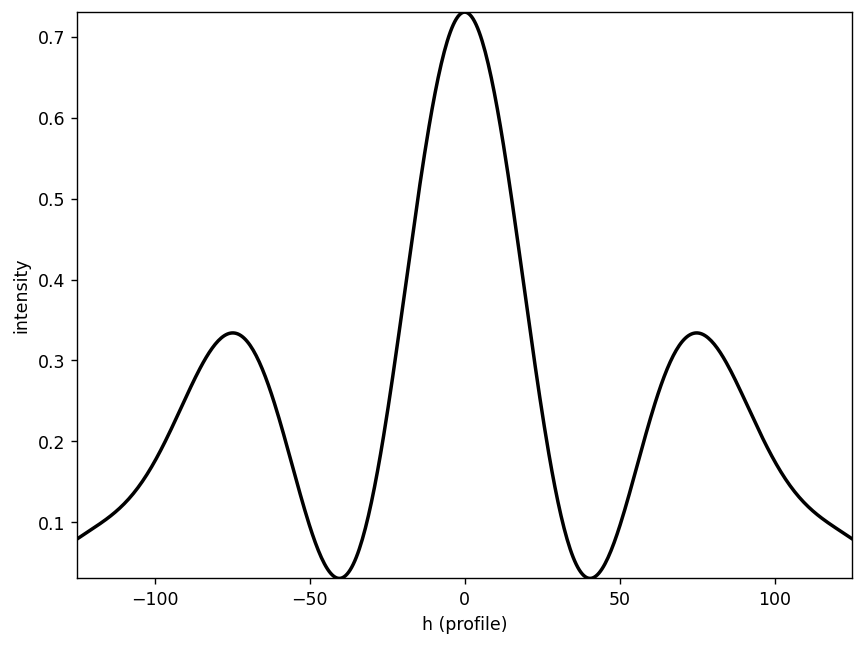

In [24]:
Ex, Ey = EM2.get('fields')
Ex.draw_profile(point1=[Ex.x[0],0], point2=[Ex.x[-1],0]);

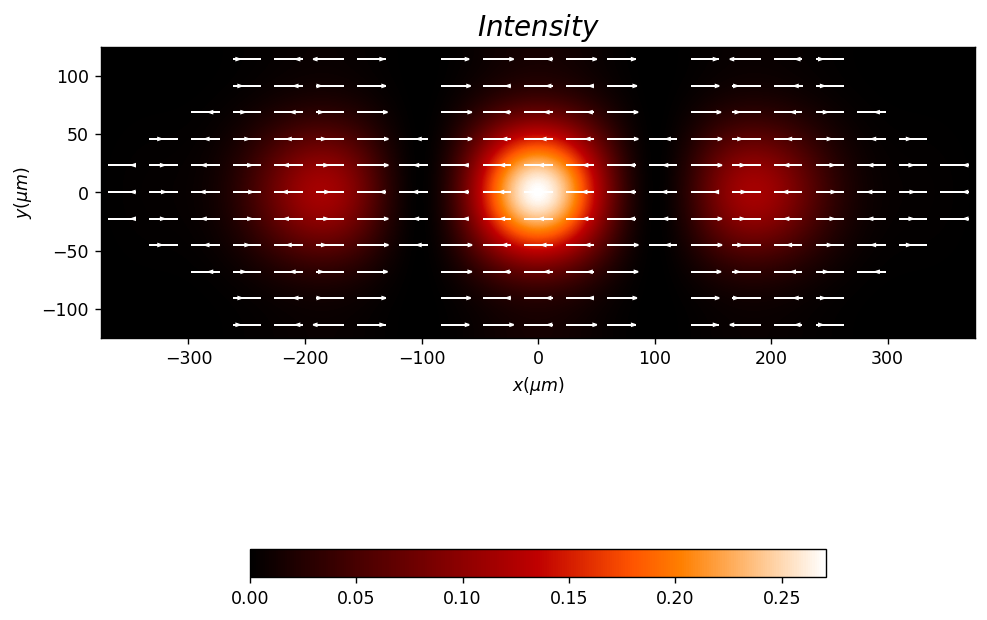

In [25]:
EM2=EM1.RS(z=25*mm, amplification=(3,1))
EM2.draw('ellipses',num_ellipses=(21,11), amplification=1)

### Crossed polarization

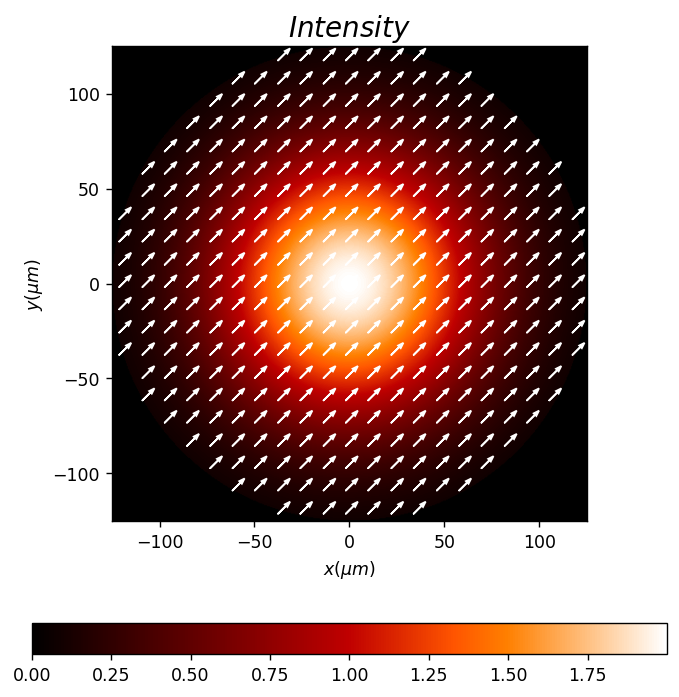

In [26]:
t1 = Scalar_mask_XY(x0,y0,wavelength)
t1.slit(x0=-40*um, size=80*um)
t1.square(r0=(-40,0), size=(50,160), angle=0)

t2 = Scalar_mask_XY(x0,y0,wavelength)
t2.slit(x0=40*um, size=80*um)
t2.square(r0=(40,0), size=(50,160), angle=0)


M1 = Vector_paraxial_mask_XY(x0, y0, wavelength)
M1.polarizer_linear(azimuth=0*degrees)
M1.apply_scalar_mask(t1)

M2 = Vector_paraxial_mask_XY(x0, y0, wavelength)
M2.polarizer_linear(azimuth=90*degrees)
M2.apply_scalar_mask(t2)


u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

EM0.constant_wave(u0, v=(1,1))
EM0.draw('ellipses', num_ellipses=(21,21))

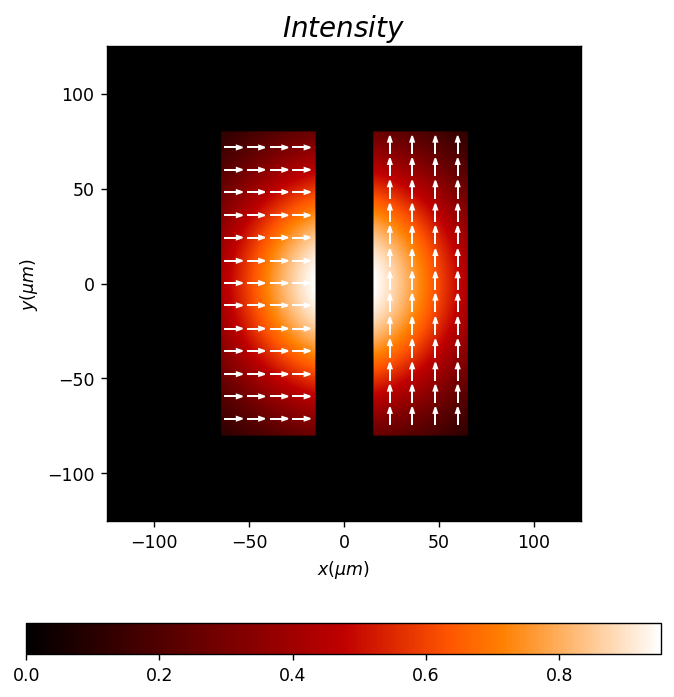

In [27]:
Et1=EM0*M1
Et2=EM0*M2


EM1=Et1+Et2
EM1.draw('ellipses', num_ellipses=(21,21))

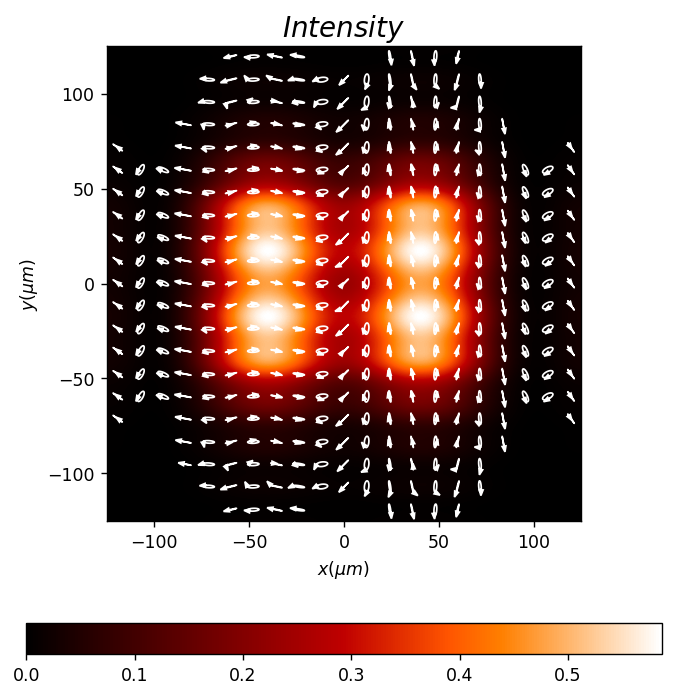

In [28]:
EM2=EM1.RS(z=5*mm)
EM2.draw('ellipses',num_ellipses=(21,21))

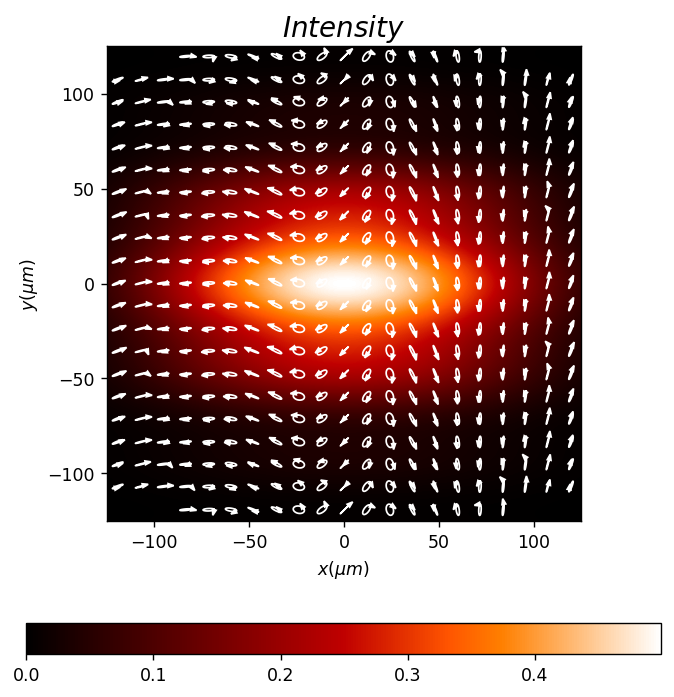

In [29]:
EM2=EM1.RS(z=10*mm)
EM2.draw('ellipses',num_ellipses=(21,21))

Good result: factor 55.19
Good result: factor 106.96
Good result: factor 55.19


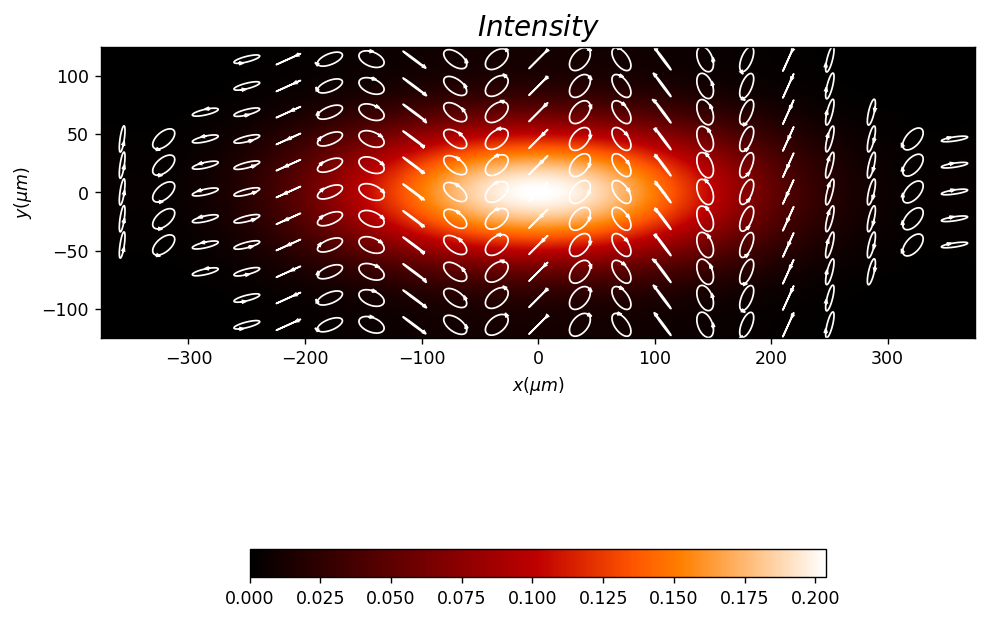

In [30]:
EM2=EM1.RS(z=25*mm, amplification=(3,1), verbose=True)
EM2.draw('ellipses',num_ellipses=(21,11), amplification=1)


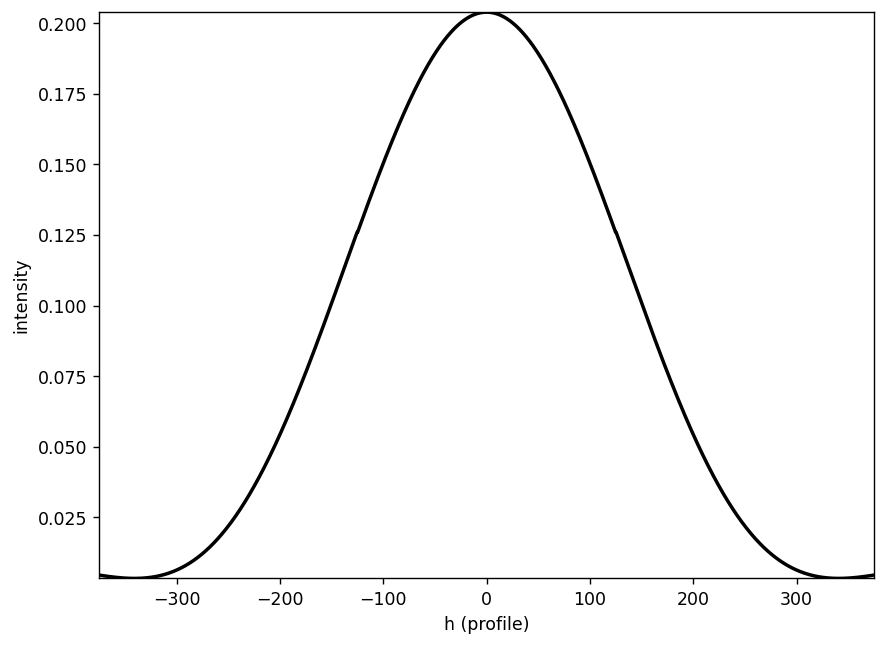

In [31]:
Ex, Ey = EM2.get('fields')
Ex.u=np.sqrt(np.abs(Ex.u)**2+np.abs(Ey.u)**2)
Ex.draw_profile(point1=[Ex.x[0],0], point2=[Ex.x[-1],0]);